# COURSE: A deep understanding of deep learning
## SECTION: Convolution and transformations
### LECTURE: Image transformations
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import numpy as np
import torch 

# NEW!
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from sklearn.model_selection import train_test_split

# for importing data
import torchvision
import torchvision.transforms as T
from torch.utils.data import TensorDataset,DataLoader

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import a dataset

In [ ]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

In [3]:
# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

print(cdata)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [4]:
# check out the shape of the dataset
print( cdata.data.shape )

# the unique categories
print( cdata.classes )

# .targets is a list of targets converted to ints
print( len(cdata.targets) )

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


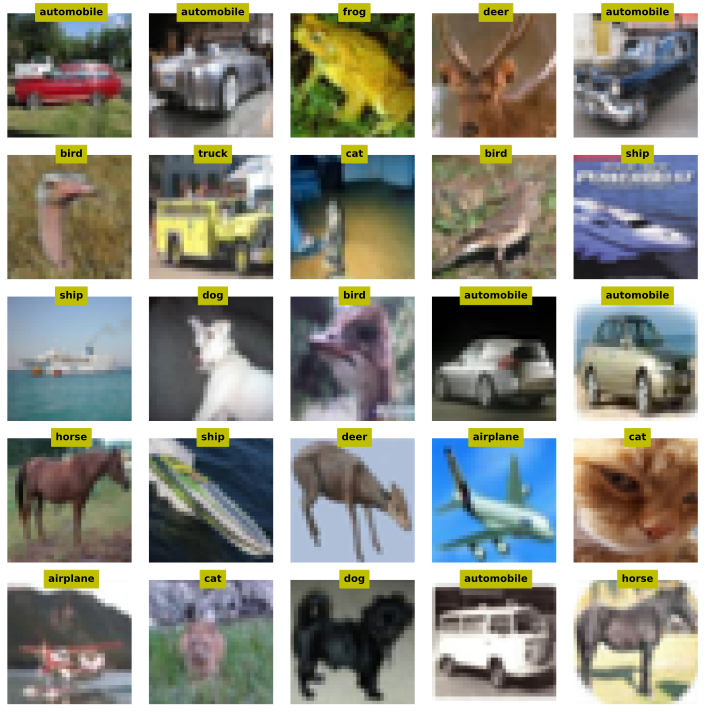

In [5]:
# inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():

  # select a random picture
  randidx = np.random.choice(len(cdata.targets))

  # extract that image
  pic = cdata.data[randidx,:,:,:]
  # and its label
  label = cdata.classes[cdata.targets[randidx]]

  # and show!
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [7]:
# inspect the data

# the categories (but how many letters??)
print(cdata.classes)
print(str(len(cdata.classes)) + ' classes')

print('\nData size:')
print(cdata.data.shape)

# transform to 4D tensor for conv layers (and transform from int8 to float)
images = torch.tensor(cdata.data).reshape([50000,3,32,32]).float()
print('\nTensor data:')
print(images.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10 classes

Data size:
(50000, 32, 32, 3)

Tensor data:
torch.Size([50000, 3, 32, 32])


In [8]:
cdata.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [8]:
images /= torch.max(images)

In [9]:
labels = torch.tensor(cdata.targets)

In [10]:
# Step 2: use scikitlearn to split the data
modeling_data,test_data, modeling_labels,test_labels = train_test_split(images, labels, test_size=.05)

train_data,validation_data, train_labels,validation_labels = train_test_split(modeling_data, modeling_labels, test_size=2500)

# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
validation_data = TensorDataset(validation_data,validation_labels)
test_data  = TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
validation_loader  = DataLoader(validation_data,batch_size=test_data.tensors[0].shape[0])
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [11]:
next(iter(train_loader))

[tensor([[[[0.2941, 0.2275, 0.2078,  ..., 0.4196, 0.2863, 0.2824],
           [0.3451, 0.4078, 0.4196,  ..., 0.4902, 0.5922, 0.3176],
           [0.3686, 0.4627, 0.3961,  ..., 0.5176, 0.5255, 0.5961],
           ...,
           [0.3373, 0.3373, 0.2627,  ..., 0.5529, 0.5176, 0.5529],
           [0.6039, 0.5529, 0.5490,  ..., 0.1922, 0.2157, 0.2078],
           [0.2000, 0.2706, 0.2510,  ..., 0.2471, 0.2510, 0.3137]],
 
          [[0.2902, 0.3020, 0.3137,  ..., 0.5882, 0.5451, 0.5843],
           [0.6471, 0.5961, 0.5922,  ..., 0.2275, 0.2118, 0.2118],
           [0.2196, 0.1922, 0.1765,  ..., 0.3412, 0.3098, 0.4235],
           ...,
           [0.2667, 0.4275, 0.3451,  ..., 0.5412, 0.5451, 0.4902],
           [0.4353, 0.4510, 0.3922,  ..., 0.7059, 0.6627, 0.6784],
           [0.7725, 0.7059, 0.7137,  ..., 0.2157, 0.2588, 0.2275]],
 
          [[0.2039, 0.5176, 0.4471,  ..., 0.5569, 0.5647, 0.5765],
           [0.4784, 0.4980, 0.5765,  ..., 0.7647, 0.7176, 0.7137],
           [0.7137, 0.63

In [12]:
# check size (should be images X channels X width X height
print( train_loader.dataset.tensors[0].shape )
print( validation_loader.dataset.tensors[1].shape )
print( test_loader.dataset.tensors[1].shape )

torch.Size([45000, 3, 32, 32])
torch.Size([2500])
torch.Size([2500])


In [13]:
# create a class for the model
def makeTheNet(printtoggle=False):

  class emnistnet(nn.Module):
    def __init__(self,printtoggle):
      super().__init__()
      
      # print toggle
      self.print = printtoggle

      ### -------------- feature map layers -------------- ###
      # first convolution layer
      self.conv1  = nn.Conv2d(3,12,3)
      self.bnorm1 = nn.LazyBatchNorm2d() 

      # second convolution layer
      self.conv2  = nn.Conv2d(12,16,3)
      self.bnorm2 = nn.LazyBatchNorm2d() 

      # third convolution layer
      self.conv3  = nn.Conv2d(16,24,3)
      self.bnorm3 = nn.LazyBatchNorm2d() 

      self.fc1 = nn.LazyLinear(64)
      self.fc2 = nn.Linear(64,32)
      self.fc3 = nn.Linear(32,10)

    def forward(self,x):
      
      if self.print: print(f'Input: {list(x.shape)}')
      
      # first block: convolution -> maxpool -> batchnorm -> relu
      x = F.max_pool2d(self.conv1(x),2)
      x = F.leaky_relu(self.bnorm1(x))
      x = F.dropout(x,p=.10,training=self.training)
      if self.print: print(f'First CPR block: {list(x.shape)}')

      # second block: convolution -> maxpool -> batchnorm -> relu
      x = F.max_pool2d(self.conv2(x),2)
      x = F.leaky_relu(self.bnorm2(x))
      x = F.dropout(x,p=.25,training=self.training)
      if self.print: print(f'Second CPR block: {list(x.shape)}')

      # third block: convolution -> maxpool -> batchnorm -> relu
      x = F.max_pool2d(self.conv3(x),2)
      x = F.leaky_relu(self.bnorm3(x))
      x = F.dropout(x,p=.10,training=self.training)
      if self.print: print(f'Third CPR block: {list(x.shape)}')

      # reshape for linear layer
      nUnits = x.shape.numel()/x.shape[0]
      x = x.view(-1,int(nUnits))
      if self.print: print(f'Vectorized: {list(x.shape)}')
      
      # linear layers
      x = F.leaky_relu(self.fc1(x))
      x = F.dropout(x,p=.4,training=self.training)
      x = F.leaky_relu(self.fc2(x))
      x = F.dropout(x,p=.4,training=self.training)
      x = self.fc3(x)
      if self.print: print(f'Final output: {list(x.shape)}')

      return x

  # create the model instance
  net = emnistnet(printtoggle)
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [14]:
# test the model with one batch
net,lossfun,optimizer = makeTheNet(True)

X,y = next(iter(train_loader))
yHat = net(X)

# check size of output
print('\nOutput size:')
print(yHat.shape)

# # now let's compute the loss
loss = lossfun(yHat,torch.squeeze(y))
print(' ')
print('Loss:')
print(loss)

Input: [32, 3, 32, 32]
First CPR block: [32, 12, 15, 15]
Second CPR block: [32, 16, 6, 6]
Third CPR block: [32, 24, 2, 2]
Vectorized: [32, 96]
Final output: [32, 10]

Output size:
torch.Size([32, 10])
 
Loss:
tensor(2.3101, grad_fn=<NllLossBackward0>)


In [15]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 10
  
  # create a new model
  net,lossfun,optimizer = makeTheNet()

  # send the model to the GPU
  net.to(device)

  # initialize losses
  trainLoss = torch.zeros(numepochs)
  testLoss  = torch.zeros(numepochs)
  trainErr  = torch.zeros(numepochs)
  testErr   = torch.zeros(numepochs)


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    net.train()
    batchLoss = []
    batchErr  = []
    for X,y in train_loader:

      # push data to GPU
      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss and error from this batch
      batchLoss.append(loss.item())
      batchErr.append( torch.mean((torch.argmax(yHat,axis=1) != y).float()).item() )
    # end of batch loop...

    # and get average losses and error rates across the batches
    trainLoss[epochi] = np.mean(batchLoss)
    trainErr[epochi]  = 100*np.mean(batchErr)

    # test performance
    X,y = next(iter(validation_loader)) # extract X,y from test dataloader

    # push data to GPU
    X = X.to(device)
    y = y.to(device)

    net.eval()
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      loss = lossfun(yHat,y)
      
    # get loss and error rate from the test batch
    testLoss[epochi] = loss.item()
    testErr[epochi]  = 100*torch.mean((torch.argmax(yHat,axis=1) != y).float()).item()

    print(f'Epoch {epochi+1}/{numepochs}, Train/Test Loss: {trainLoss[epochi]:.3f}/{testLoss[epochi]:.3f}, Train/Test Err: {trainErr[epochi]:.2f}/{testErr[epochi]:.2f}')

  # end epochs

  # function output
  return trainLoss,testLoss,trainErr,testErr,net

In [16]:
trainLoss,testLoss,trainErr,testErr,net = function2trainTheModel()

Epoch 1/10, Train/Test Loss: 2.018/1.846, Train/Test Err: 75.58/67.52
Epoch 2/10, Train/Test Loss: 1.871/1.778, Train/Test Err: 69.38/65.16
Epoch 3/10, Train/Test Loss: 1.830/1.790, Train/Test Err: 67.76/64.92
Epoch 4/10, Train/Test Loss: 1.800/1.728, Train/Test Err: 67.00/62.96
Epoch 5/10, Train/Test Loss: 1.775/1.699, Train/Test Err: 65.09/62.32
Epoch 6/10, Train/Test Loss: 1.755/1.644, Train/Test Err: 64.41/60.48
Epoch 7/10, Train/Test Loss: 1.744/1.783, Train/Test Err: 63.90/63.72
Epoch 8/10, Train/Test Loss: 1.731/1.660, Train/Test Err: 63.71/60.20
Epoch 9/10, Train/Test Loss: 1.725/1.755, Train/Test Err: 63.01/61.56
Epoch 10/10, Train/Test Loss: 1.712/1.617, Train/Test Err: 62.61/58.68


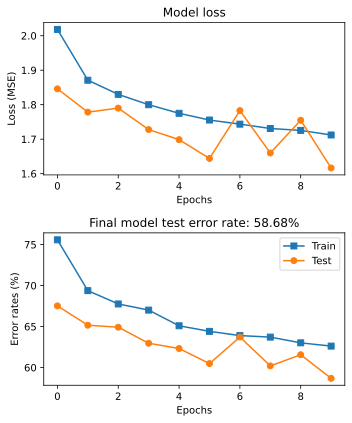

In [17]:
fig,ax = plt.subplots(2,1,figsize=(5,6))

ax[0].plot(trainLoss,'s-',label='Train')
ax[0].plot(testLoss,'o-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss (MSE)')
ax[0].set_title('Model loss')

ax[1].plot(trainErr,'s-',label='Train')
ax[1].plot(testErr,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Error rates (%)')
ax[1].set_title(f'Final model test error rate: {testErr[-1]:.2f}%')
ax[1].legend()

plt.tight_layout()
plt.show()

In [18]:
# Get a batch of test data
X_test, y_test = next(iter(test_loader))

# Move data to the appropriate device
X_test = X_test.to(device)
y_test = y_test.to(device)

# Set the model to evaluation mode
net.eval()

# Make predictions
with torch.no_grad():
    yHat_test = net(X_test)

# Calculate error rate
error_rate = torch.mean((torch.argmax(yHat_test, axis=1) != y_test).float()).item() * 100
print(f'Test error rate: {error_rate:.2f}%')

Test error rate: 57.84%


# Apply some transformations

In [7]:
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(32*4),
                 T.Grayscale(num_output_channels=1)  ])

# include the transform in the dataset
cdata.transform = Ts

# you can also apply the transforms immediately when loading in the data
# cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True, transform=Ts)


# Important! Adding a transform doesn't change the image data:
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


In [17]:
# apply the transform

# option 1a: apply the transform "externally" to an image
img1 = Ts( cdata.data[123,:,:,:] )

# option 1b: use the embedded transform
img2 = cdata.transform( cdata.data[123,:,:,:] )

# let's see what we've done!
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap='gray')

plt.show()

NameError: name 'Ts' is not defined

In [9]:
# Note about ToTensor() and normalization:
??T.ToTensor()

Object `T.ToTensor()` not found.


# Additional explorations

In [ ]:
# 1) There are many other transforms available in torchvision: https://pytorch.org/vision/stable/transforms.html
#    Many transformations are useful for data preparation and augmentation. We'll cover some of them later in the course,
#    but for now, read about RandomCrop(), RandomHorizontalFlip(), and CenterCrop(). Then implement them to understand 
#    what they do to images.
#    Tip: It's probably best to test these transforms separately, and on one test image, as we did above.
# 